In [6]:
# This notebook analyses the ouput of 
# running complexity.py

# grep 'for_parser:' complexity_PM.txt | sed 's/for_parser:,//g' | sed '1 i\cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac, CSR_PM_count'
# The above shell must be run and saved to PM.csvCSR_PM_frac

In [39]:
# ! grep 'for_parser:' t | sed 's/for_parser:,//g' > PM_scales_london_processed_exp.csv

In [35]:
import sys

sys.path.append("../")
import config

import numpy as np
import matplotlib.pyplot as plt
from smartprint import smartprint as sprint

In [36]:
config.scales

[25, 35, 45, 55, 65, 75, 85, 95]

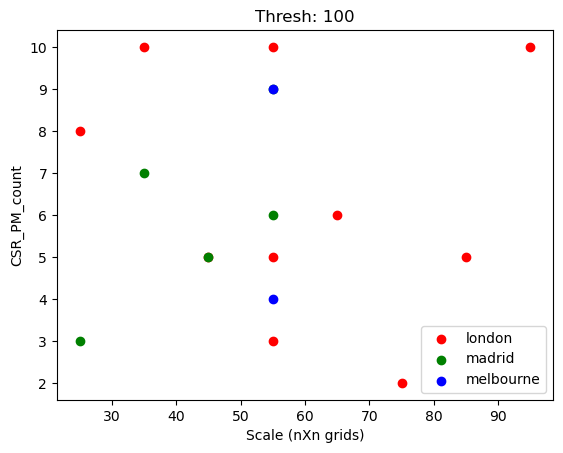

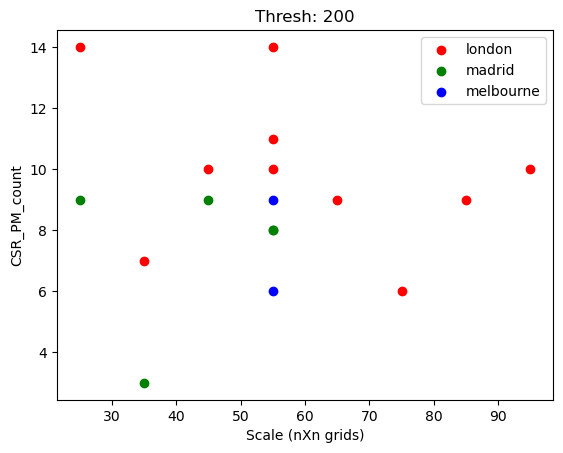

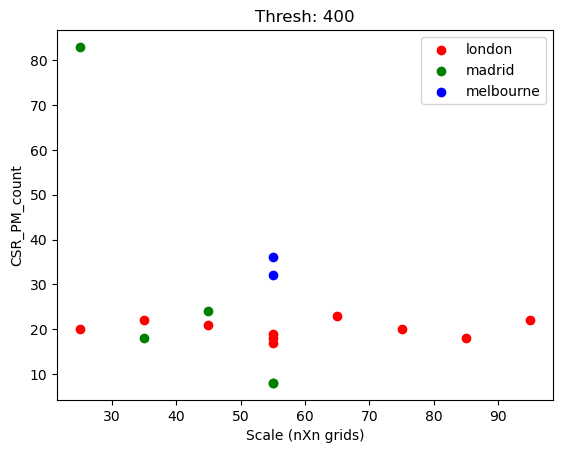

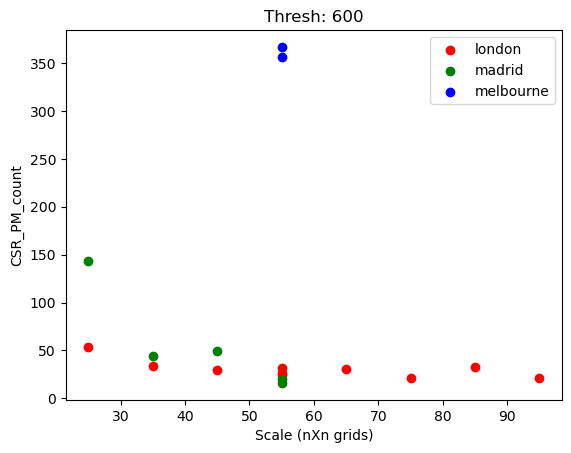

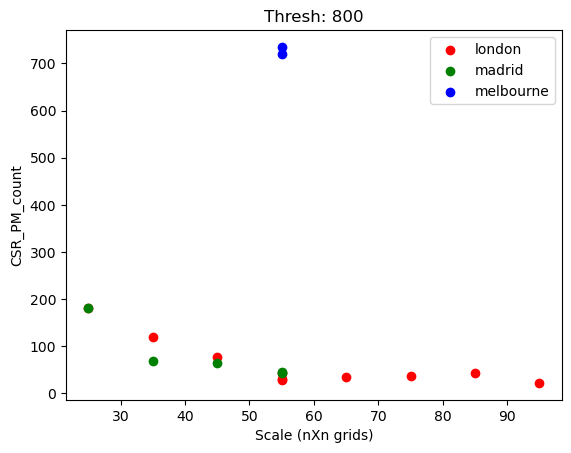

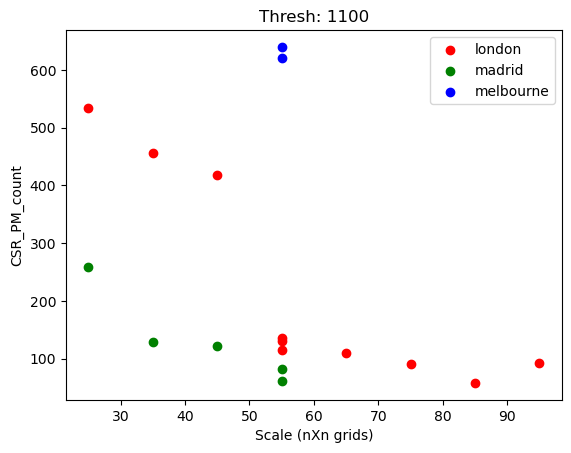

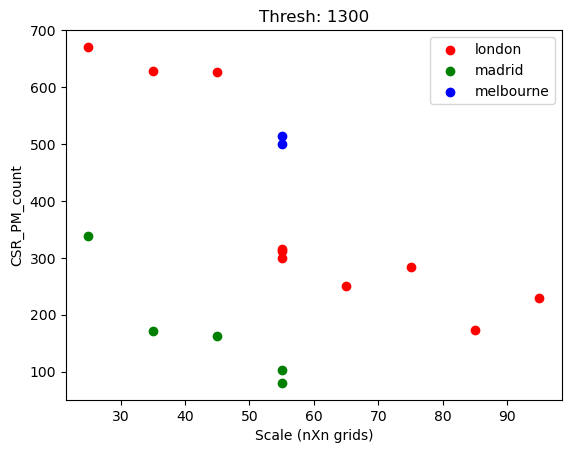

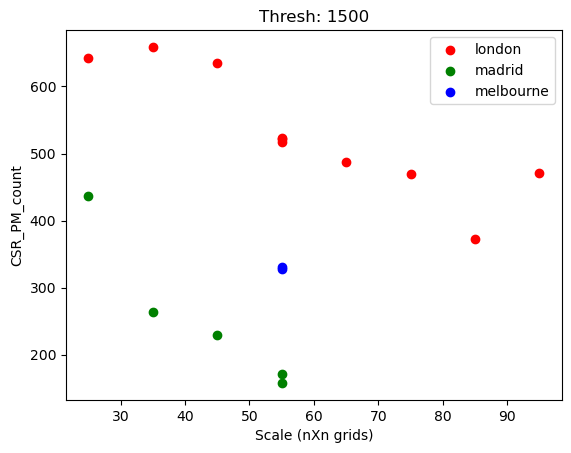

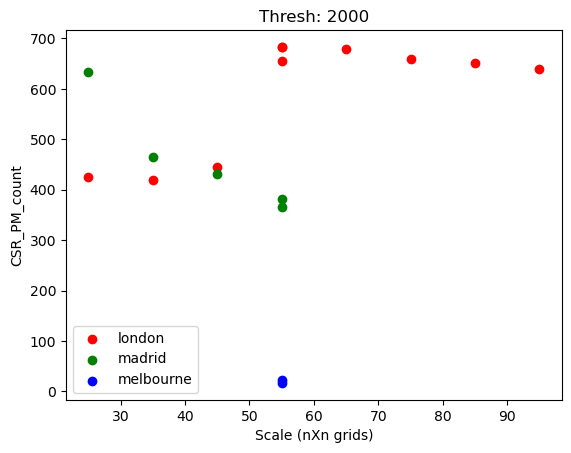

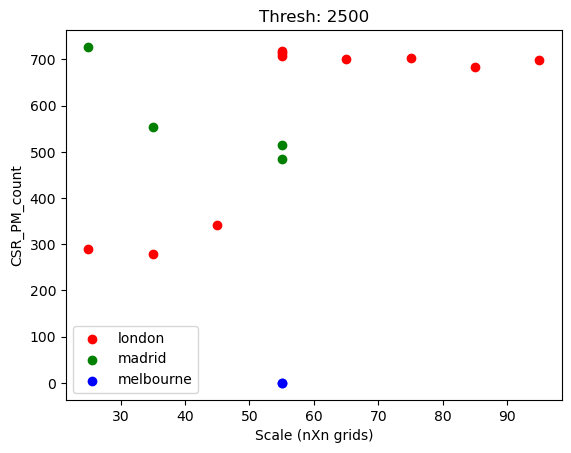

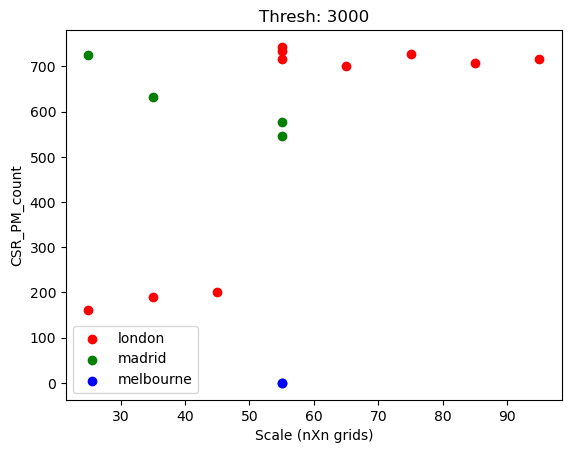

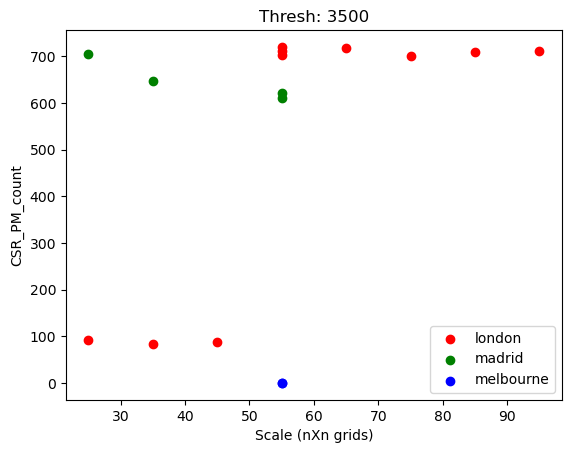

In [38]:
import pandas as pd
df = pd.read_csv("PM_scales_london_processed.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()

# scales

for thresh in [100, 200, 400, 600, 800, 1100, 1300, 1500, 2000, 2500, 3000, 3500]:

    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in config.i_o_lengths_def:
                for pred_horiz in config.pred_horiz_def:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]

                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_count")
    plt.legend()
    plt.show()
    
    

In [42]:
import pandas as pd
df = pd.read_csv("PM_scales_london_processed_exp.csv")

city_color = {"london" : "red", 
             "melbourne": "blue",
             "madrid": "green"}
df.head()


,cityname,i_o_length,prediction_horizon,grid_size,thresh,cx_sample_whole_data,cx_sample_single_point,CSR_PM_frac,CSR_PM_count,CSR_PM_no_thresh_median,CSR_PM_no_thresh_mean,CSR_PM_frac_exp,CSR_PM_count_exp,CSR_PM_no_thresh_median_exp,CSR_PM_no_thres_exph_mean,Unnamed: 15,Unnamed: 16
0,london,4,1,25,100,800,40,NaN,NaN,22.0,711.174926,NaN,NaN,22.0,711.174926,NaN,NaN
1,london,4,1,35,100,800,40,NaN,NaN,22.0,714.431059,NaN,NaN,22.0,714.431059,NaN,NaN
2,london,4,1,45,100,800,40,NaN,NaN,24.0,745.828299,NaN,NaN,24.0,745.828299,NaN,NaN
3,london,4,1,55,100,800,40,NaN,NaN,29.0,1484.280472,NaN,NaN,29.0,1484.280472,NaN,NaN
4,london,4,1,65,100,800,40,NaN,NaN,24.0,1519.195435,NaN,NaN,24.0,1519.195435,NaN,NaN


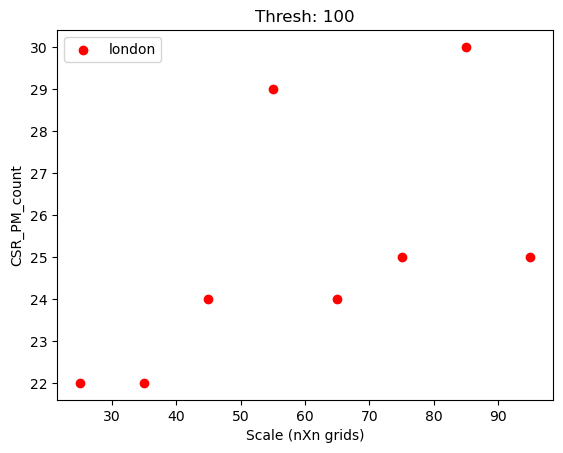

In [47]:

# scales

for thresh in [100]:

    for city in config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in config.scales:
            for i_o_length in [4]:
                for pred_horiz in [1]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]
                    # print (filtered_rows)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_median_exp, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_no_thresh_median_exp, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_count")
    plt.legend()
    plt.show()
    
    

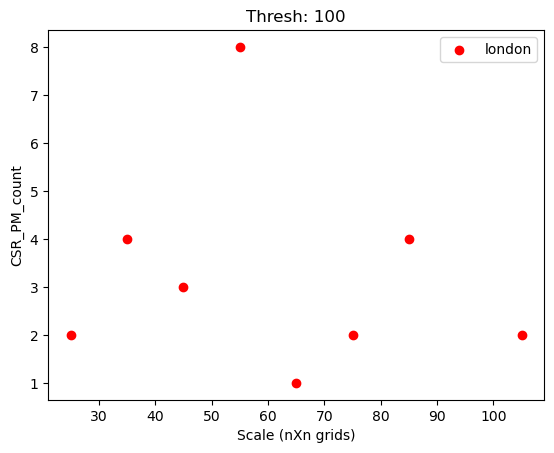

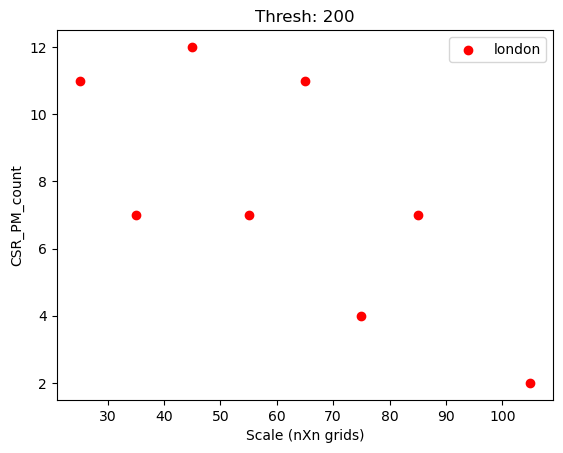

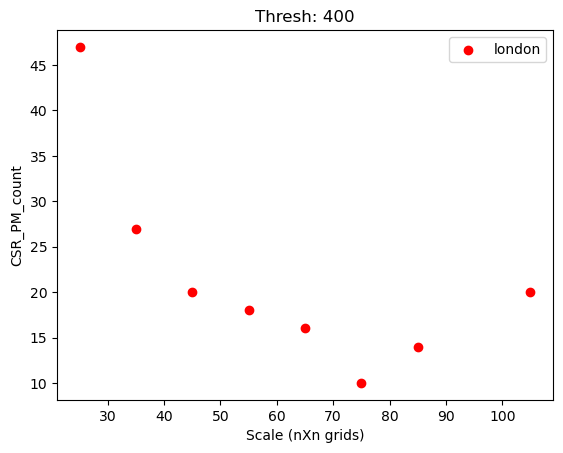

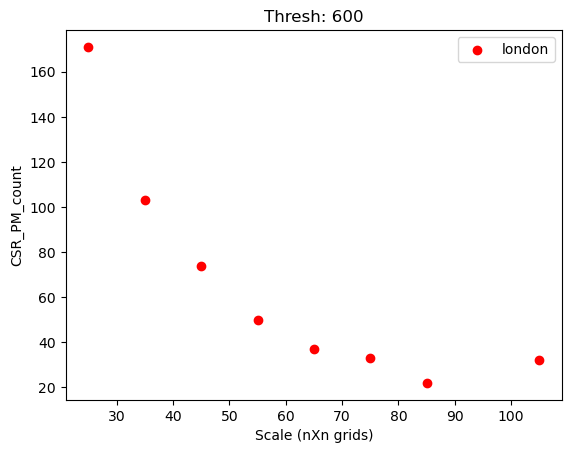

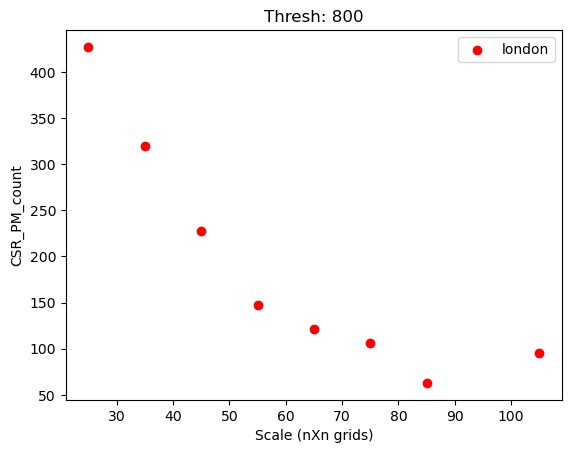

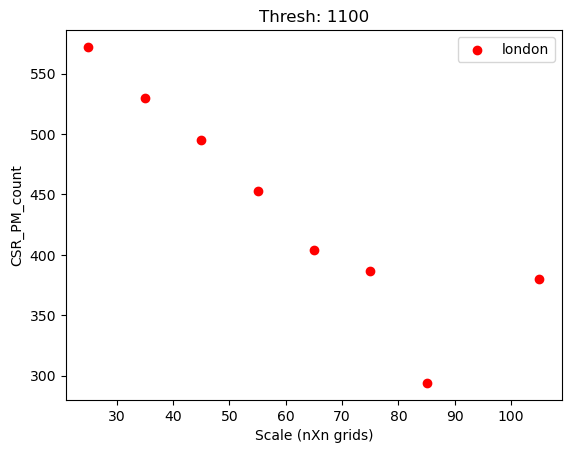

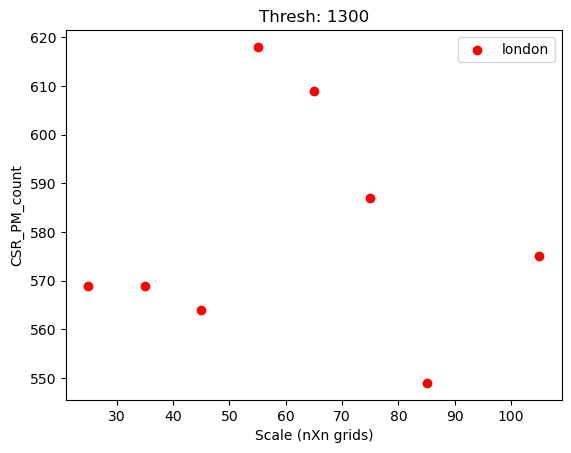

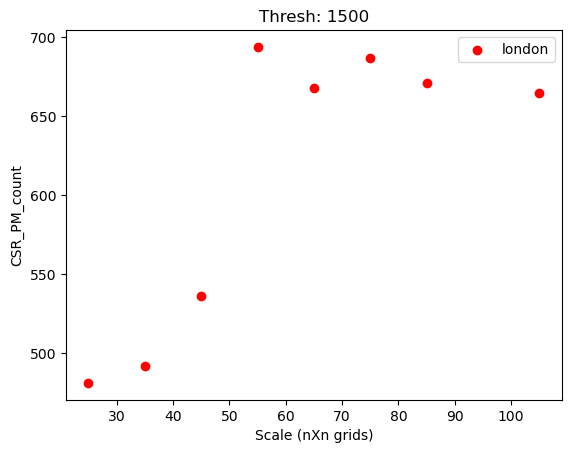

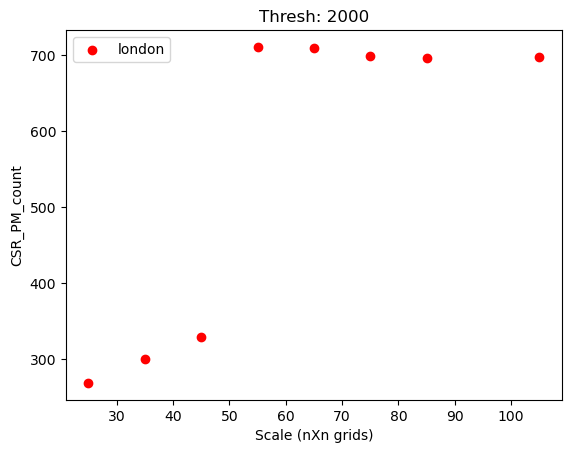

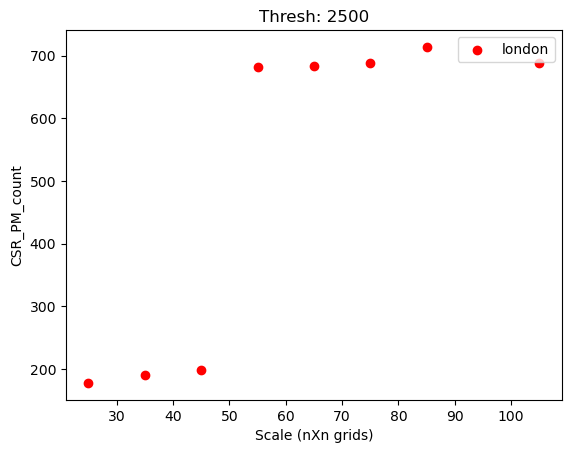

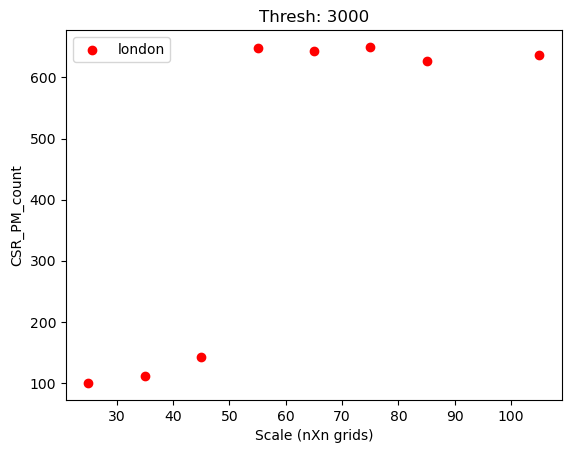

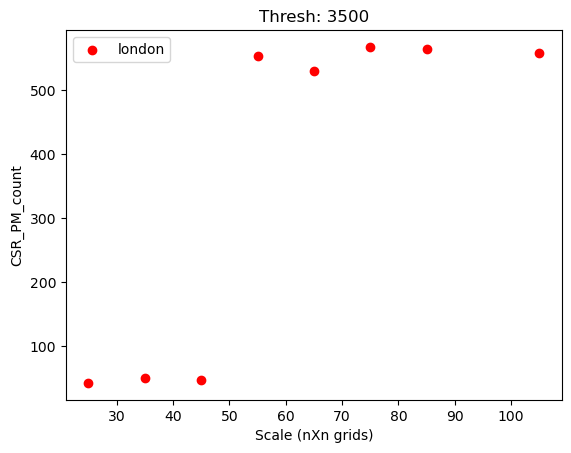

In [23]:

for thresh in [100, 200, 400, 600, 800, 1100, 1300, 1500, 2000, 2500, 3000, 3500]:

    for city in ["london"]: # config.city_list:

        cityname = city.lower()

        city_label_printed = []

        for scale in [25, 35, 45, 55, 65, 75, 85, 105]:
            for i_o_length in [1]:
                for pred_horiz in [4]:
                    filtered_rows = df[    \
                                       (df["i_o_length"]==i_o_length) & \
                                       (df["grid_size"]==scale) & \
                                       (df["prediction_horizon"]==pred_horiz) &\
                                       (df["cityname"]==cityname) &\
                                       (df["thresh"]==thresh)
                                      ]
                    # print (filtered_rows)
                    if filtered_rows.shape[0] == 1:
                        range_ = [0]
                    else:
                        range_ = list(range(filtered_rows.shape[0]))
                        # sprint (cityname, scale, i_o_length, pred_horiz, filtered_rows.shape)
                        # no worries, will be plotted multiple times # this is three times because of first combination overlap


                    for i in range_:
                        if cityname in city_label_printed:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname])
                        else:
                            plt.scatter(scale, filtered_rows.iloc[i].CSR_PM_count, color=city_color[cityname], label=cityname)
                            city_label_printed.append(cityname)

    plt.title("Thresh: " + str(thresh))
    plt.xlabel("Scale (nXn grids)")
    plt.ylabel("CSR_PM_count")
    plt.legend()
    plt.show()
    
    